# Assignment 1 Cognitive Modelling <font color='red'>Deadline = 18 april 23:59</font>

Dit is de eerste opdracht voor Cognitive Modelling. Hieronder volgen vragen en opdrachten over verschillende leermodellen. Bij elke vraag staat de hoeveelheid punten die je er voor kan krijgen. In totaal kan je voor deze opdracht __94__ punten halen.

Geef antwoorden in blokken met code of met tekst. Gebruik voor antwoorden met tekst de ">" voor blockquotes en geef bij elke vraag ook __kort uitleg__ als hier om wordt gevraagd. __Let op__: soms staan er meerdere vragen bij een onderdeel, lees de tekst dus nauwkeurig. 

Sla het uiteindelijke notebook __met al gerunde output__ op, met jullie studentnummers en achternamen in de filenaam: `studentnummer1_achternaam1_studentnummer2_achternaam2_opdrachtnummer`. 

> Dit is een voorbeeld voor het antwoord bij uitlegvragen, hier kan je eventueel `code` gebruiken.

### Matplotlib plotting basics

Hieronder een aantal links naar tutorials en documentatie voor het gebruik van `matplotlib` voor het maken van grafieken.

* [Pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html)

* [Axis labels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html)

* [Adding a legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)

*  zie [hier](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) voor een markdown cheatsheet, en [hier](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols) voor een handige lijst $\LaTeX$ symbolen


In [2]:
# run these to initialize libraries
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

---

# Pt. 1 Het Rescorla-Wagner model

De Rescorla-Wagner theorie illustreert hoe leermethoden gevoelig kunnen zijn voor de link tussen een geconditioneerde stimulus (CS) en een ongeconditioneerde stimulus (US). In het experiment van Pavlov leert een hond de associatie tussen een belletje en het krijgen van vlees. 

Een hond produceert normaliter speeksel als voedsel (US) wordt aangeboden. Na het herhaaldelijk horen van een belletje voordat de hond het vlees krijgt, zal de hond leren dat dit belletje (CS) gevolgd wordt door het vlees. De hond zal vervolgens na het horen van het belletje al speeksel produceren. Het effect van de geconditioneerde stimulus (het belletje) wordt groter als er vaker een koppeling wordt gepresenteerd met een ongeconditioneerde stimulus (het vlees): hoe vaker de associatie aangeboden wordt, hoe groter de respons en hoe groter dus de associatieve sterkte ($V$ in het Rescorla-Wagner model). 

Het Rescorla-Wagner model vormt de basis voor alle Reinforcement Learning modelen die veelvuldig gebruikt worden in kunstmatige intelligentie. Met dit model kun je sterktes van associaties kwantificeren, en begrijpen hoe deze veranderen met tijd. Ook kunnen we verschillende simulaties met het model doen om te kijken wat voor gedrag het wel, maar ook **niet** voorspelt. Deze simulaties kunnen ons inzicht geven tot op welke hoogte een model de onderliggende cognitieve processen goed beschrijft. 

Meer details over het Rescorla-Wagner model, extinctie, compound stimuli en blocking kan je vinden in *Learning & Memory*, en in de college slides.

## 1. Associatieve sterktes

Stel dat de CS (het belletje 🔔) en de US (het vlees 🍖) 10 keer worden aangeboden. De hond had vooraf geen enkele associatie met het belletje, dus de sterkte van de associatie voordat de CS en US de eerste keer worden gepresenteerd is 0: $V_{t=0} = 0$. 

De maximale sterkte die de associatie tussen de CS en US kan hebben is 100: $V_{max} = 100$, en de leersnelheid is 0.4: $\alpha = 0.4$. 

Om het simpel te houden gaan we in de opdrachten uit van een simpel RW-model met maar één learning rate:

$$ V_{t+1} = V_t + \Delta V_t $$
$$ \Delta V_t = \alpha(V_{max} - V_t) $$

<br>

### Q1.a (4 punten)
Het belletje wordt nu voor de eerste keer aangeboden en de hond krijgt de beloning. Wat is de waarde van $V$ en $\Delta V$ na de eerste leertrial? Dus op $t = 1$?

> $$ V_{t+1} = Vt + \alpha(V{max} - Vt
) $$
$$ V{t+1} = V_t + 40 - 0.4Vt$$
$$ V{t+1} = 0.6Vt + 40$$

$$V{t+1} = 0.6*V0 + 40$$
$$V{t+1} = 40$$
$$V_{0+1} = 40$$
$$V_1 = 40$$

### Q1.b (4 punten)

Schrijf een functie die de waardes van $V$ en $\Delta V$ kan uitrekenen en bijhouden voor meerdere leertrials. Zorg er ook voor dat je kan aangeven welke associatie er eventueel al is tussen de stimulus en beloning. Noem de functie `rescorla_wagner()`.

Om je op weg te helpen:
```python
def rescorla_wagner(alpha, v_start, v_max, trials):
    v_list = [V_0] # list with V_0
    delta_list = [∆V_0] # list with delta V_0
    
    for _ in range(trials):
        #1 calculate V_t
        #2 store V_t in list Vs
        #3 calculate ∆V_t 
        #4 store ∆V_t in list ∆Vs

    return (v_list, delta_list)
```

**Let op!** Als je de waardes *na* 5 leertrials wilt berekenen, zal deze functie 6 waardes teruggeven voor $V$ en $\Delta V$, omdat $V_0$ en $\Delta V_0$ ook zijn toegevoegd. Dat is de bedoeling. De eerste waarde, met index = 0, betekent na 0 leertrials. De tweede waarde, met index = 1, betekent na 1 leertrial, etc. Dus *na* 10 trials, gebruik je index = 10.

In [3]:
def rescorla_wagner(alpha, v_start, v_max, trials):
    # TO DO
    v_list = [v_start]
    delta_list = []

    for _ in range(trials):
        v_delta = alpha * (v_max - v_list[-1])
        delta_list.append(v_delta)
        vt = v_list[-1] + delta_list[-1]
        v_list.append(vt)
    return (v_list, delta_list)

### Q1.c (3 punten)

Gebruik de functie om het leren van een associatie in 10 trials te simuleren. Gebruik hiervoor dan een learning rate van 0.4 ($\alpha$), een associatie van nul om te beginnen ($V$), en een $V_{max}$ van 100. Wat zijn de berekende waardes voor $V$ en $\Delta V$ na 10 trials? Hoe interpreteer je deze waardes?

In [4]:
# TO DO
rescorla_wagner(0.4, 0, 100, 10)

([0,
  40.0,
  64.0,
  78.4,
  87.04,
  92.224,
  95.3344,
  97.20064,
  98.320384,
  98.9922304,
  99.39533824],
 [40.0,
  24.0,
  14.4,
  8.639999999999999,
  5.1839999999999975,
  3.1103999999999985,
  1.8662399999999992,
  1.1197439999999972,
  0.6718463999999984,
  0.40310784000000127])

> *Interpretatie*

### Q1.d (3 punten)
We gaan nu een aantal grafieken maken om het gedrag van het model beter te begrijpen door de leercurves te laten zien. Om je op weg te helpen is hier een functie om de grafieken weer te geven:

``` python
%matplotlib inline
import matplotlib.pyplot as plt

def plot_trials(x_label, y_label, line_labels, *results_list):
    trials = range(len(results_list[0]))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    for result in results_list:
        plt.plot(trials, result)
    
    plt.legend(line_labels)
    plt.show()
```
De eerste twee argumenten gebruik je om de x- en y-as te labelen. Je kan bijvoorbeeld `x_label = r"$t$"` en `y_label = r"$V$"` gebruiken om aan te geven dat het om $t$ trials op de x-as en $V$ associatie waardes op de y-as gaat.

Plot nu de grafiek van de hele leercurve voor 10 trails van de vorige opgave ($\alpha$ = 0.4, $V_{t=0}$ = 0, $V_{max}$ = 100). Gebruik hiervoor de output van `rescorla_wagner()` en gebruik `plt.hlines(95, 0, 10, colors='red')` voordat je `plot_trials()` aanroept om een horizontale lijn op 95% toe te voegen. Met het argument `line_labels` kan je een label aan je leercurve toevoegen. Je kan `line_labels = []` gebruiken als je geen gebruik wil maken van deze optie.

Na hoeveel trials is de associatieve sterkte op 95% van de maximale associatieve sterkte? 

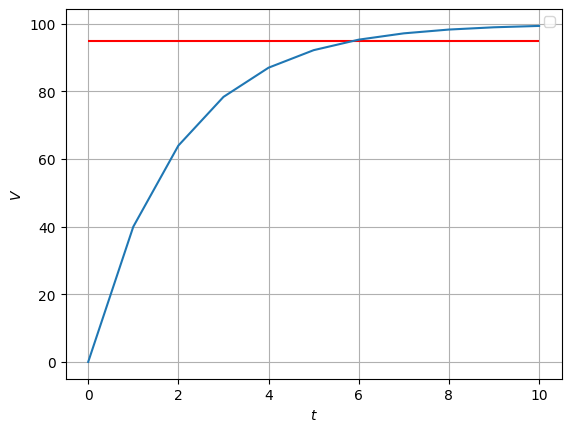

In [5]:
# TO DO plot
%matplotlib inline
import matplotlib.pyplot as plt

def plot_trials(x_label, y_label, line_labels, *results_list):
    trials = range(len(results_list[0]))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    for result in results_list:
        plt.plot(trials, result)

    plt.legend(line_labels)
    plt.grid()
    plt.show()

plt.hlines(95, 0, 10, colors='red')
v, _ = rescorla_wagner(0.4, 0, 100, 10)
plot_trials(r"$t$", r"$V$", [], v)

> Uit de plot is af te lezen dat na 6 trials de associatieve sterkte op 95% zit.

### Q1.e (4 punten)

Bereken nu ook de associatieve sterktes $V$ voor andere waardes van $\alpha$ (0.1 en 0.6). Maak een plot met de twee leercurves voor de verschillende waardes van $\alpha$. Met `line_labels = [r"$\alpha = 0.1$", r"$\alpha = 0.6$"]` kan je ervoor zorgen dat beide lijnen de juiste labels krijgen.

Wat is het effect van een hogere of lagere $\alpha$ op $V$?

Plot in een aparte grafiek ook de $\Delta V$'s, hoe verschillen die voor de verschillende $\alpha$'s ?

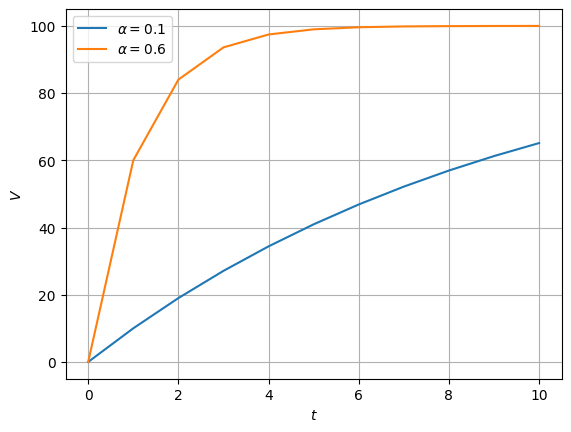

In [6]:
# TO DO plot V
v2, _ = rescorla_wagner(0.1, 0, 100, 10)
v3, _ = rescorla_wagner(0.6, 0, 100, 10)
plot_trials(r"$t$", r"$V$", [r"$\alpha = 0.1$", r"$\alpha = 0.6$"], v2, v3)

> Effect van $\alpha$ op $V$
Een hogere alpha is een snellere learning rate, de v zal bij een hogere alpha sneller de vmax benaderen.

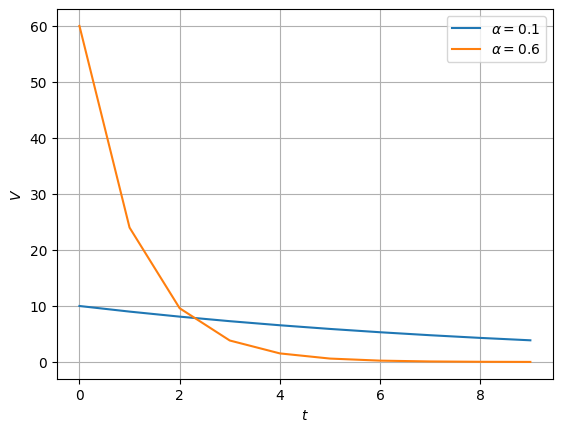

In [7]:
# TO DO plot delta V
_, delta_v2 = rescorla_wagner(0.1, 0, 100, 10)
_, delta_v3 = rescorla_wagner(0.6, 0, 100, 10)
plot_trials(r"$t$", r"$V$", [r"$\alpha = 0.1$", r"$\alpha = 0.6$"], delta_v2, delta_v3)

> Effect van $\alpha$ op $\Delta V$


---

## 2. Extinctie curves

Nu ga je een extinctie curve plotten. Volg de stappen hieronder om de juiste waardes van $V$ te kunnen uitrekenen. In geval van extinctie begint de hond met al een sterke associatie tussen bel en beloning ($V_{t=0} > 0$), maar deze associatie dooft uit. Gebruik dat $V = 100$ de associatie is aan het begin tussen de stimulus en de beloning. Wat er nu gaat gebeuren is dat de bel rinkelt en de hond niks krijgt (maar dat dus wel verwacht).

### Q2.a (2 punten)

Wat is de associatie waarde $V_{max}$ bij extinctie trials?


> *Antwoord*
V is de assiciatieve sterkte, bij extincite trials kijken we hoe snel een agent gedrag vergeet.
Als een agent alles is vergeten is de Vmax gelijk aan 0.

### Q2.b (2 punten)

Bereken nu de waarde van $V$ na de eerste extinctie trial met behulp van `rescorla_wagner()` (gebruik $\alpha$ = 0.4). Wat is deze waarde $V_{t=1}$?

In [8]:
# TO DO
extinctie_v, extinctie_rest  = rescorla_wagner(0.4, 100, 0, 1)
print(extinctie_v)

[100, 60.0]


### Q2.c (3 punten)

Bereken nu de waardes van $V$ voor twintig extinctie trials en plot deze in een grafiek. Na hoeveel extinctie trials is de associatieve sterkte $V$ minder dan 1% van de associatieve sterkte waar je mee begon? Gebruik weer de horizontale lijn om dit goed te kunnen zien. 

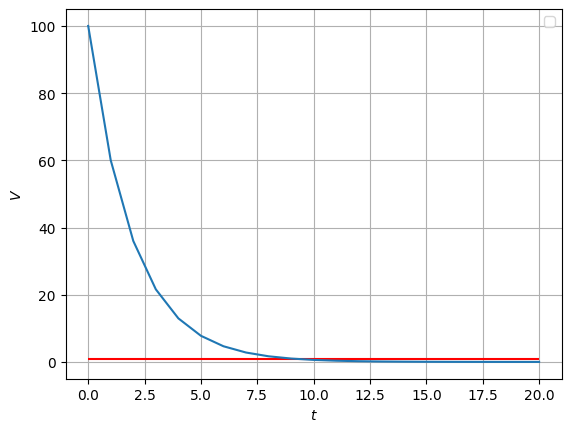

In [9]:
# TO DO plot
extinctie_v2, absolute_waardes  = rescorla_wagner(0.4, 100, 0, 20)
plt.hlines(1, 0, 20, colors='red')
plot_trials(r"$t$", r"$V$", [], extinctie_v2)

> *Antwoord*
Na ongeveer 9 trials is V minder dan 1%.

### Q2.d (5 punten)

Plot ook de absolute waardes van $\Delta V$ in een aparte grafiek, wat gebeurt daar mee?

Als je $\Delta V$ zou moeten omschrijven als een cognitief of psychologisch proces, wat zou dat zijn? Waarom is het aan het begin van extinctie groot en later kleiner?

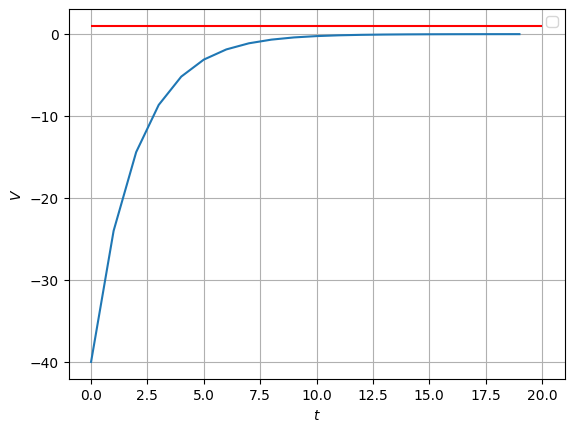

In [10]:
# TO DO plot
plt.hlines(1, 0, 20, colors='red')
plot_trials(r"$t$", r"$V$", [], absolute_waardes)

> *Antwoord*
De absolute waardes worden negatief omdat de associatieve sterkte afneemt.

---

## 3. Compound stimuli

De basis van het Rescorla-Wagner model is duidelijk. Nu gaan we kijken naar het Rescorla-Wagner model voor compound stimuli. Bij compound stimuli bestaat de CS niet uit 1 stimulus maar uit een samenstelling van meerdere stimuli, bijvoorbeeld A (belletje) en B (lampje). Zoals in het college besproken, wordt de maximale associatieve waarde ($V_{max}$) van de US dan verdeeld over de stimuli A en B (etc.). 

Het idee hierachter is dat het associatieproces wordt gestuurd door aandacht. De stimulus waar de meeste aandacht aan wordt besteed, of die de meeste aandacht vraagt, zal een hogere learning rate krijgen. Daarom zullen stimuli die meer opvallen een sterkere associatie krijgen. Het is mogelijk dat de aandacht die een stimulus krijgt ervoor zorgt dat associaties beter of langer in het geheugen worden opgeslagen.

Aandacht is een hele efficiënte manier om leren te versnellen. Het implementeren van aandacht speelt ook een belangrijke rol in de ontwikkelingen van deep neural networks. Als je hier meer over wilt lezen kijk dan eens naar https://arxiv.org/abs/1802.04712 of https://dl.acm.org/doi/10.1145/3055635.3056621. We weten nog steeds niet precies hoe aandacht werkt, maar deze papers laten zien hoe het mogelijk geïmplementeerd kan worden in DNN's en hoe dat het leren kan versnellen!

Neem voor de volgende opdracht aan dat er twee stimuli zijn: A 🔔 en B 💡. Stimulus A (het belletje) is indringender dan stimulus B (het lampje), dus A krijgt meer aandacht en heeft een hogere leersnelheid ($\alpha = 0.4$) dan stimulus B ($\alpha = 0.1$). Neem aan dat $V_{max}$ weer 100 is en $V_{t=0}=0$.

<br>

### Q3.a (5 punten)
Maak één grafiek met de associatieve sterktes van A ($V_A$), B ($V_B$) en de compound van A en B ($V_A + V_B$), drie lijnen in totaal. Schrijf hiervoor een nieuwe functie `rescorla_wagner_cs()` en plot deze drie associatieve sterktes voor 20 leertrials. Baseer deze functie op je originele `rescorla_wagner()`. 

**Let op!** Als het goed is kan $V_A+V_B$ nooit meer zijn dan $V_{max}$. 

In [11]:
def rescorla_wagner_cs(alpha_A, alpha_B, v_start_A, v_start_B, v_max, trials):
    #TO DO
    V_a = [v_start_A]
    V_b = [v_start_B]
    V_total = [v_start_A + v_start_B]

    for _ in range(trials):
        total_V = V_a[-1] + V_b[-1]
        delta_A = alpha_A * (v_max - total_V)
        delta_B = alpha_B * (v_max - total_V)

        new_V_A = V_a[-1] + delta_A
        new_V_B = V_b[-1] + delta_B
        V_a.append(new_V_A)
        V_b.append(new_V_B)
        V_total.append(new_V_A + new_V_B)

    return V_a, V_b, V_total

print(rescorla_wagner_cs(0.4, 0.1, 0,0, 100, 20))

([0, 40.0, 60.0, 70.0, 75.0, 77.5, 78.75, 79.375, 79.6875, 79.84375, 79.921875, 79.9609375, 79.98046875, 79.990234375, 79.9951171875, 79.99755859375, 79.998779296875, 79.9993896484375, 79.99969482421875, 79.99984741210938, 79.99992370605469], [0, 10.0, 15.0, 17.5, 18.75, 19.375, 19.6875, 19.84375, 19.921875, 19.9609375, 19.98046875, 19.990234375, 19.9951171875, 19.99755859375, 19.998779296875, 19.9993896484375, 19.99969482421875, 19.999847412109375, 19.999923706054688, 19.999961853027344, 19.999980926513672], [0, 50.0, 75.0, 87.5, 93.75, 96.875, 98.4375, 99.21875, 99.609375, 99.8046875, 99.90234375, 99.951171875, 99.9755859375, 99.98779296875, 99.993896484375, 99.9969482421875, 99.99847412109375, 99.99923706054688, 99.99961853027344, 99.99980926513672, 99.99990463256836])


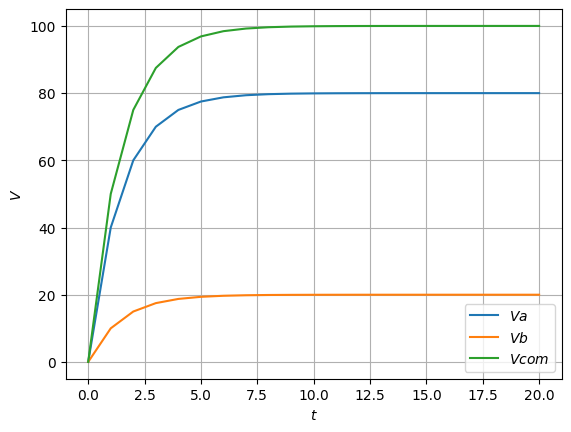

In [12]:
# TO DO plot
Va, Vb, Vcom = rescorla_wagner_cs(0.4, 0.1, 0,0, 100, 20)
plot_trials(r"$t$", r"$V$", [r"$Va$", r"$Vb$", r"$Vcom$"], Va,Vb, Vcom)

### Q3.b (4 punten)

Bij het begin van het experiment zijn alle associatie sterktes $V$ = 0. Wat zijn de associatie sterktes van $V_A$, $V_B$ en $V_A + V_B$ na de eerste trial? En wat zijn de waardes na 20 trials?


In [13]:
# TO DO
Va_eerste, Vb_eerste, Vcom_eerste = rescorla_wagner_cs(0.4, 0.1, 0,0, 100, 20)
print(f' De waarde van; Va, na eerste trial is{Va_eerste[1]} en na 20 trials is het: {Va_eerste[-1]}')
print(f' De waarde van; Va, na eerste trial is{Vb_eerste[1]} en na 20 trials is het: {Vb_eerste[-1]}')
print(f' De waarde van; Va, na eerste trial is{Vcom_eerste[1]} en na 20 trials is het: {Vcom_eerste[-1]}')

 De waarde van; Va, na eerste trial is40.0 en na 20 trials is het: 79.99992370605469
 De waarde van; Va, na eerste trial is10.0 en na 20 trials is het: 19.999980926513672
 De waarde van; Va, na eerste trial is50.0 en na 20 trials is het: 99.99990463256836


---

## 4. Blocking

Ga er bij het volgende experiment van uit dat er weer twee stimuli zijn: een belletje A 🔔 en een lampje B 💡. Dit keer is het lampje even duidelijk als het belletje (zet voor beide stimuli $\alpha = 0.2$). Alleen nu zal bij dit blocking experiment alleen stimulus A in de eerste fase worden aangeboden en daarna na een tijd beide stimuli tegelijk:

fase 1:  CS$_A$ $\rightarrow$ US (20 trials)

fase 2:  CS$_A$ + CS$_B$ $\rightarrow$ US (20 trials)

### Q4.a (3 punten)

Bij het begin van het experiment zijn alle associatie sterktes 0. Wat is de associatie sterkte $V_A$ na de eerste trial in fase 1? En van $V_B$ na de eerste trial in fase 1? En beide waardes na de tweede trial in fase 1? 

**Let op!** je kan hier gebruik maken van de functie die je voor opdracht 3 over compound stimuli hebt geschreven: `rescorla_wagner_cs()`.

In [14]:
# TO DO
Va_fase1, _ = rescorla_wagner(0.2, 0, 100, 20)
print(f'De associatie sterkte van Va in fase 1 na 1 trial is: {Va_fase1[1]}')
print(f'De associatie sterkte van Vb in fase 1 na 1 trial is 0')
print(f'De associatie sterkte van Va in fase 1 na 2 trials is: {Va_fase1[2]}')
print(f'De associatie sterkte van Vb in fase 1 na 2 trials is 0')

De associatie sterkte van Va in fase 1 na 1 trial is: 20.0
De associatie sterkte van Vb in fase 1 na 1 trial is 0
De associatie sterkte van Va in fase 1 na 2 trials is: 36.0
De associatie sterkte van Vb in fase 1 na 2 trials is 0


### Q4.b (5 punten)

Bereken nu de associatieve sterktes van $V_A$ en $V_B$ voor de 20 trials in fase 1, en dan voor de 20 trials in fase 2. Maak één grafiek met de associatieve sterktes van $V_A$ en $V_B$ voor deze 40 trials in totaal. 

Wat gebeurt er met de associatieve sterktes van stimulus B? Hoe zal de hond reageren als er na deze 40 trials alleen een lampje aangaat zonder bel?

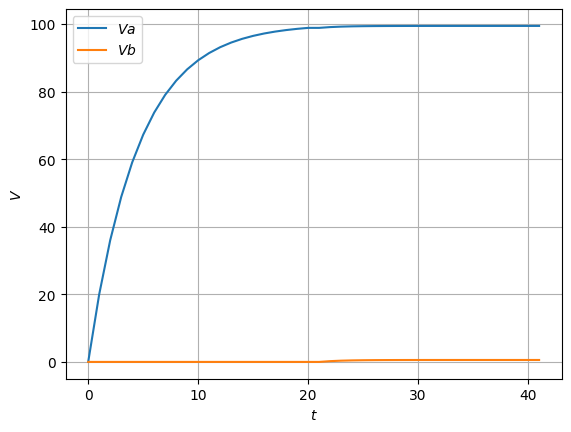

In [15]:
# TO DO plot
fase_2_Va, fase_2_Vb, _ = rescorla_wagner_cs(0.2, 0.2, Va_fase1[-1], 0, 100, 20)
Va_total = Va_fase1 + fase_2_Va
Vb_fase1 = [0 for _ in range(len(Va_fase1))]
Vb_total = Vb_fase1 + fase_2_Vb
plot_trials(r"$t$", r"$V$", [r"$Va$", r"$Vb$", r"$Vcom$"], Va_total, Vb_total)

> *Antwoord*

---

## 5. Latent inhibition

In het volgende experiment zijn er twee honden. De eerste hond, Schnauzie 🐕, wordt in een hok gehouden waar af en toe, zonder goede reden, een belletje af gaat (🔔CS). Als het belletje gaat gebeurt er verder niks. De tweede hond, Bello 🐩, wordt in een hok gehouden waar helemaal nooit iets te horen valt. Vervolgens doen beide honden mee aan het experiment van Pavlov waarbij een belletje (🔔CS) aan een beloning (🦴️US) wordt gekoppeld.

<br>

### Q5.a (5 punten)

Simuleer de data voor beide honden en plot de learning curves van pre-exposure en leertrials samen in één grafiek ($\alpha = 0.4$). Gebruik 10 pre-trials voor de pre-exposure van Schnauzie ($V_{max}=0$), en dan 10 leertrials voor beide honden (nu wel een beloning dus $V_{max}$ = 100). 

Je kan voor de pre-exposure en leertrials `rescorla_wagner()` gebruiken om de waardes van $V$ uit te rekenen, of je kunt een nieuwe functie schrijven.

Leg uit wat je ziet in de grafiek, klopt dit met wat je hebt geleerd over pre-exposure leercurves?


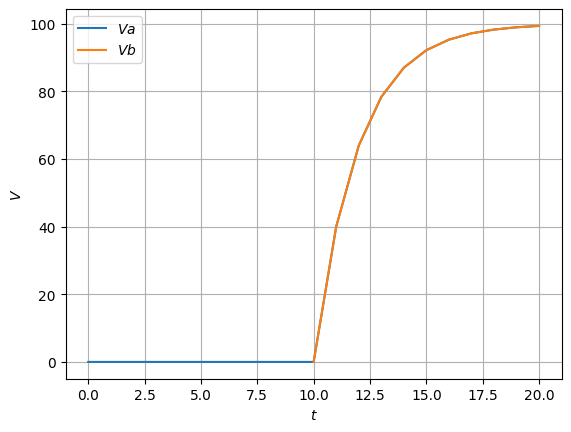

In [29]:
# TO DO plot
v_pre_schnauzie, _ = rescorla_wagner(0.4, 0, 0, 10)

v_leer_schnauzie, _ = rescorla_wagner(0.4, v_pre_schnauzie[-1], 100, 10)

v_schnauzie = v_pre_schnauzie + v_leer_schnauzie[1:]

v_bello, _ = rescorla_wagner(0.4, 0, 100, 10)
v2_bello = [None]*10 + v_bello

plot_trials(r"$t$", r"$V$", [r"$Va$", r"$Vb$", r"$Vcom$"], v_schnauzie, v2_bello)

> *Antwoord*

### Q5.b (4 punten)

Hier de data van een echt pre-exposure effect:
<img src="Images\curves.png" alt="Drawing" style="width: 600px;"/>


Hoe verschillen jouw learning curves met die van een echt pre-exposure effect? Wat is daar een mogelijke verklaring voor? Hoe zou jij het Rescorla-Wagner model aanpassen om dit te ondervangen?

> *Antwoord*

---

# Pt. 2 Pearce-Hall error learning theory

Een van de meest voor de hand liggende oplossingen van *latent inhibition* is dat de learning rates verschillen. Het Pearce Hall leermodel (PH) kan onder andere latent inhibition verklaren. Als je hier meer over wilt lezen: Pearce J.M. and Hall G. (1980) [A model for Pavlovian learning: Variations in the effectiveness of conditioned but not of unconditioned stimuli. Psychological Review](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=bfde4e5ddaa6a968df9984b557baccd7cb38fb82).

__Let op!__ De notatie in deze opgave wijkt een klein beetje af van de notatie in de hoorcollege slides. Voor het oplossen van deze opdracht gebruik je de notatie zoals hieronder beschreven.

Net als in het RW model geldt dat $V_{t+1} = V_t + \Delta V_t$. In tegenstelling tot het RW model wordt volgens het PH model de verandering in de associatieve sterkte ($\Delta V_t$) echter bepaald door de volgende vergelijking:

$$\Delta V_t = S * \alpha_t * V_{max}$$

De scalar $S$ wordt bepaald door de intensiteit van de CS en door de intensiteit van de US. De parameter $\alpha$ vertegenwoordigt de _associability_ van de CS en wordt verondersteld <u>hoog</u> te zijn voor nieuwe stimuli. De parameter $S$ zagen we in het college ook als parameter $\beta$ bij het RW model. De intensiteit kan dus ook weer in verband worden gebracht met aandacht: hoe intenser, hoe meer aandacht en hoe sneller het leren gaat. 

In tegenstelling tot de $\alpha$ in het RW-model is $\alpha$ in het Pearce-Hall-model niet statisch maar dynamisch. Voor het RW model is de learning rate $\alpha$ constant en bepaalt deze alleen de grootte van de verrassing (*prediction error*), dus of er veel of weinig geleerd wordt (ofwel hoe groot $\Delta V$ is). Bij het PH-model kan de  _associability_ rate $\alpha$ juist veranderen. Deze wordt bepaald door:

$$ \alpha_{t} = |V_{max} - V_t| \qquad (t \geq 1)$$

Dat wil zeggen, de waarde van $\alpha$ die wordt gebruikt om $V_{t+1}$ te berekenen wordt bepaald door de absolute waarde van het verschil tussen $V_{max}$ en de associatie sterkte na leertrial $t$. Dit betekent dat een grote (absolute) prediction error ervoor zorgt dat er sterk geleerd wordt op _de volgende_ trial. Dus een grote verassing zorgt dat er in de toekomst sneller geleerd wordt. 

Bij eenvoudige *conditionering*, waarbij een CS betrouwbaar is gekoppeld aan een US, verhoogt $V$ op basis van ervaring  en  daalt $\alpha$ (nadert nul naarmate asymptoot in leren wordt bereikt). De scalar $S$ wordt wel verondersteld statisch te zijn, en lijkt in die zin dus meer op de learning rate in het RW model.

### Q.6a (6 punten)
Schrijf een functie `pearce_hall()` die een lijst van $\Delta V$ waarden, een lijst van $V$ waarden, en een lijst van $\alpha$ waarden als output heeft, zodat je kan bijhouden hoe deze waardes per trial veranderen.

Om je op weg the helpen:

`def pearce_hall(S, alpha=0.7, v_start=0, v_max=1, trials=10):` 

oftewel, de input voor het model is scalar $S$, $\alpha$, $V = 0$ en $V_{max}$ = 1. De beginwaarde voor $\alpha$ wordt niet berekend met de bovenstaande formule, maar wordt als input meegegeven. De inputwaarde is in dit geval hoog ($\alpha_0 = 0.7$) omdat de stimuli aan het begin nieuw zijn.


In [17]:
def pearce_hall(S, alpha=0.7, v_start=0, v_max=1, trials=10):
    # TO DO 
    V = [v_start]
    delta_V = [0]
    alphas = [alpha]
    for _ in range(trials):
        # calculate the new delta V
        delta_vt = S * alphas[-1] * v_max
        delta_V.append(delta_vt)
        # calculate the new V
        Vt = V[-1] + delta_V[-1]
        V.append(Vt)
        # calculate the new alpha
        a_t = np.abs(v_max - V[-1])
        alphas.append(a_t)
    return delta_V, V, alphas

* Plot met behulp van deze functie de curves voor $\Delta V$, $V$ en $\alpha$ in drie aparte grafieken voor 10 trials met verschillende waardes van $S$: 0.2 en 0.6

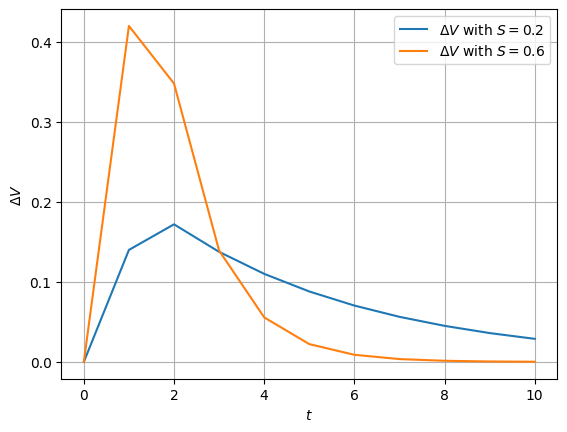

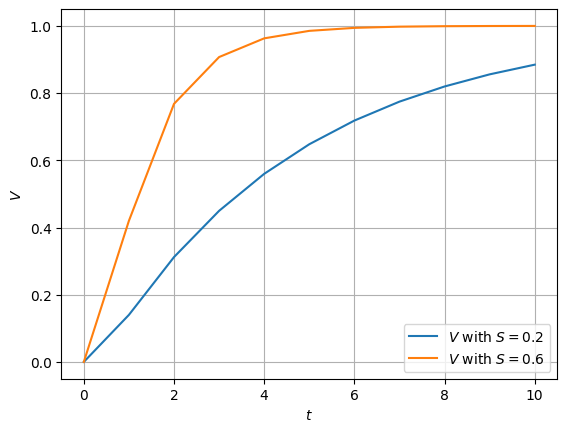

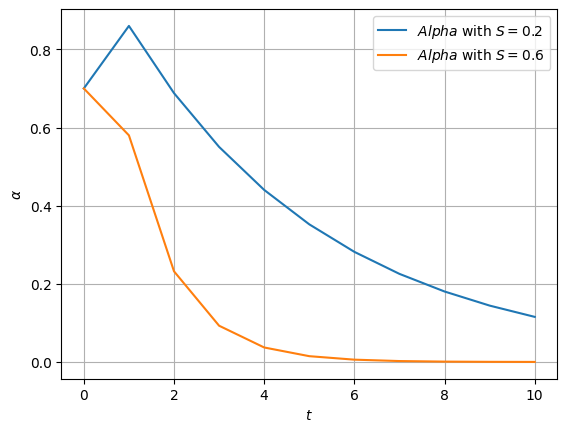

In [18]:
# TO DO plot
delta_V1, V1, alphas1 = pearce_hall(S=0.2, alpha=0.7, v_start=0, v_max=1, trials=10)
delta_V2, V2, alphas2 = pearce_hall(S=0.6, alpha=0.7, v_start=0, v_max=1, trials=10)

plot_trials(r"$t$", r"$\Delta V$", [r"$\Delta V$ with $S=0.2$", r"$\Delta V$ with $S=0.6$"], delta_V1, delta_V2)
plot_trials(r"$t$", r"$V$", [r"$V$ with $S=0.2$", r"$V$ with $S=0.6$"], V1, V2)
plot_trials(r"$t$", r"$\alpha$", [r"$Alpha$ with $S=0.2$", r"$Alpha$ with $S=0.6$"], alphas1, alphas2)


* Vergelijk deze grafieken met de leercurves van het RW model; 
* Beschrijf wat de verschillende waardes van $S$ voor invloed hebben op $\Delta V$, $V$ en $\alpha$.

> *Antwoord*

* Laat vervolgens in een plot zien dat pre-exposure wel invloed heeft, en je dus wel een (klein) effect van latent inhibition ziet. (Tip! leer het model eerst voor 10 trials met $V_{max}=0$ ga dan verder met de $\alpha$ die je dan hebt).

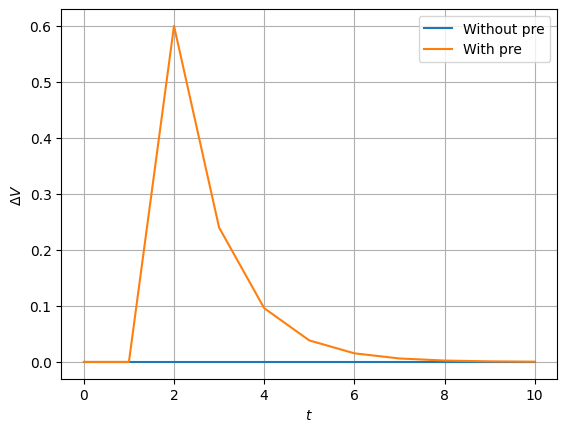

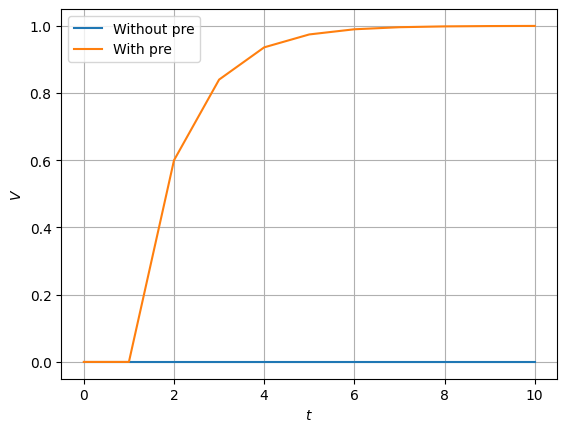

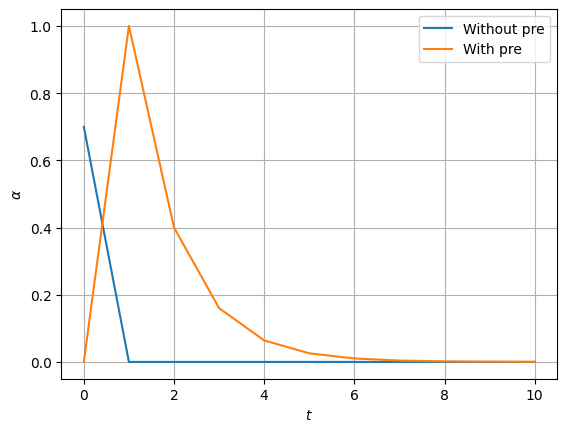

In [19]:
# TO DO plot
delta_V, V, alphas = pearce_hall(S=0.6, alpha=0.7, v_start=0, v_max=0, trials=10)
delta_V2, V2, alphas2 = pearce_hall(S=0.6, alpha=alphas[-1], v_start=0, v_max=1, trials=10)

plot_trials(r"$t$", r"$\Delta V$", [r"Without pre", r"With pre"], delta_V, delta_V2)
plot_trials(r"$t$", r"$V$", [r"Without pre", r"With pre"], V, V2)
plot_trials(r"$t$", r"$\alpha$", [r"Without pre", r"With pre"], alphas, alphas2)

###  Pearce-Hall and beyond

Onlangs is er bewijs gevonden voor zowel PH- als RW-leersignalen in het menselijk brein, wat suggereert dat het onderliggende algoritme aspecten van beide integreert. Het kan zijn dat grote prediction errors leiden tot een directe impact op het leren van de huidige gebeurtenis (grote $\Delta V$), maar ook de aandacht richten op toekomstige gebeurtenissen (vergroten van $\alpha$) en zo het leren bij volgende gebeurtenissen vergroten (of juist de aandacht verminderen omdat er een tijdje niets interessants gebeurt en de $\alpha$ verlagen). 

De Pearce Hall modellen waren wat minder populair dan het Rescorla Wagner model, dus veel van huidge Reinforcement Learning modellen hebben geen dynamische learning rates. Toch is dat erg belangrijk, en je ziet ook dat dit soort modellen weer in opkomst zijn. Voor het oplossen van bepaalde Reinforcement Learning problemen gaan kunstmatige intelligentie onderzoekers vaak gewoon een paar learning rates uitproberen om te kijken welke het beste werkt. Op basis van de inzichten uit deze voorbeelden zouden sommige modelen dus makkelijker verbeterd kunnen worden door dynamische learning rates toe te voegen. 

Suggesties om verder te lezen:

Pearce and Hall (1980) [A model for Pavlovian learning: Variations in the effectiveness of conditioned but not of unconditioned stimuli. Psychological Review](https://pdfs.semanticscholar.org/3630/3957caa2ebda4d04b6f25334d4fe9bf4b3cf.pdf) <br>
Roesch et al. (2002) [Surprise! Neural Correlates of Pearce-Hall and Rescorla-Wagner Coexist within the Brain](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3325511/#R92) <br>
Behrens et al. (2007) [Learning the value of information in an uncertain world](https://www.nature.com/articles/nn1954) <br>
Piray & Daw (2020) [A simple model for learning in volatile environments](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007963#pcbi.1007963.ref006)


### Q.6b (2 punten)
Kan je bedenken in wat voor omgeving een dynamische learning rate handig kan zijn en wanneer juist niet? Je kan inspiratie opdoen in Behrens et al. (2007) en  Piray & Daw (2020).

> *Antwoord*

---

# Pt. 3 Temporal Difference Learning 

Temporal difference learning is een uitbreiding op het RW model dat ook de rol van tijd en geheugen in het koppelen van de CS en de US kan beschrijven. Het is een simpele uitbreiding van het Rescorla Wagner model en vormt tot op de dag van vandaag de basis van de meeste reinforcement learning algoritmes. 

Tijd is heel erg belangrijk omdat in de meeste gevallen beloningen van ons gedrag ver in de toekomst liggen. Denk bijvoorbeeld aan het spel Go. Pas aan het eind, als de winnaar bekend is gemaakt, komt er een beloning. We zouden niet willen zeggen dat alleen de laatste zet de winnende zet was, en dus alleen die geassocieerd moet worden met de beloning. Alle zetten hebben op een of andere manier meegeholpen aan de overwinning. Een van de grootste computationele uitdagingen is om ook deze zetten goed te associëren met de beloning. Dit heet ook wel het *credit assignment problem*. Temporal Difference Learning is een eerste, simpele, maar krachtige zet in die richting.

Details over het TD model zijn terug te vinden in de college slides, het hoofdstuk van Gureckis & Love [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf) en voor meer verdieping in het online boek van [**Sutton & Barto**](http://incompleteideas.net/book/bookdraft2018jan1.pdf) en dan met name hoofdstuk 6 en 12.

Het leren in deze opdracht speelt zich af in een simpel **Markov Reward Process** met de volgende structuur:

![](Images\random_walk.png)

De robot start elke episode in $C$, en gooit dan telkens een muntje op om te bepalen welke kant hij op gaat (kop = links, munt = rechts, beide 50% kans). Zodra de robot één van de vierkante eindpunten bereikt is de episode (het spel) over en begint de robot weer bij punt $C$. 

Alleen als de robot in het rechter eindpunt eindigt krijgt hij 1 punt, alle andere beloningen zijn nul. Toch zal de robot op een gegeven moment doorhebben dat als hij naar rechts beweegt, hij steeds op een betere plek terecht komt. We kijken in dit voorbeeld nog even niet naar keuzes, er wordt immers telkens een muntje opgegooid, maar we brengen eerst in kaart hoe er een associatie kan komen tussen verschillende states en toekomstige beloningen. 

In het begin van het experiment heeft de robot geen enkele kennis van de wereld en geen enkele verwachting voor elke staat:

$$V(A)=V(B)=V(C)=V(D)=V(E)= 0, \quad\text{idem voor de vierkante eindpunten}$$

## 7. Het TD-model

Zoals gezegd is het TD model gebaseerd op het RW model, met de aanpassing dat het de factor tijd kan meenemen. De volledige formulering van het TD model is:

$$V(s_t) = V(s_t) + \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)]$$

Deze formule schrijft voor hoe de verwachting voor de staat waar we waren op tijdstip $t$ moet worden geüpdatet op basis van waar we zijn beland op tijdstip $t + 1$. __Let op: deze formule staat verkeerd in de hoorcollege slides.__ Daar lijkt de update-regel voor $V(s_{t+1})$ te zijn, maar het is echt $V(s_t)$ die we moeten updaten. Verder is de uitleg over dit model en deze formule uit het hoorcollege erg nuttig, dus kijk de opname over dit stukje nog eens terug voordat je deze opgave maakt. Zie ook [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf).




### Q7.a (2 punten)

Stel de robot speelt dit spel voor de eerste keer en begeeft zich nu in state E. ![](Images\random_walk_reward.png)

In het begin is de verwachte waarde van staat E nul ($V(E)=0$). Nu gooit de robot het muntje op en stapt voor het eerst naar rechts en verdient $1$ punt.

Wat is hierna de verwachte waarde $V(E)$?

* Gegeven $\alpha = 0.1$ en $\gamma =1$? 
* En voor $\alpha = 0.6$ en $\gamma =1$?

Reken uit aan de hand van bovenstaande formule.

> *Antwoord*
$V(st) = V(E)\\
De \ start \ waarde \ van \ V(E) = 0 \ dus:\\
voor \ alpha = 0.1\\
V(E) = V(E) + \alpha[r_{t+1} + \gamma V_{(s_t+1)} - V(s_t)]\\
V(E) = 0 + 0.1[1 + 0]\\
V(E) = 0.1\\
\\
voor \ alpha = 0.6\\
V(E) = V(E) + \alpha[r_{t+1} + \gamma V_{(s_t+1)} - V(s_t)]\\
V(E) = 0 + 0.6[1 + 0]\\
V(E) = 0.6\\$

### Q7.b (6 punten)

Schrijf een functie `td_zero()` die als input, alpha ($\alpha$) , gamma ($\gamma$) en het aantal episodes accepteert. De output van deze functie moet een lijst met values $V$ zijn voor elke staat (A t/m E) na het leren van een aantal  episodes.


##### Pseudo code:
* Initieer de staat van de wereld:
    * Er zijn 7 states (5 letters & 2 endpoints), voor alle $V_{t=0} = 0$
* Creëer een `for loop` over alle episodes
    * Elke episode begint in state C
* In elke episode blijf je lopen tot je een van de eindpunten bereikt `while loop`
    * Gooi muntje op, en maak een stap, houd bij in welke state je bent.
    * Kijk wat je beloning is na maken van stap en update $V_t$
    * Eindpunt bereikt? Beëindig de episode en start een nieuwe, zo niet weer muntje opgooien

In [20]:
def td_zero(alpha, gamma, num_episodes):
    # TO DO
    # initialize states (A, B, C, D, E)
    states = {"start": [0], "A": [0], "B": [0], "C": [0], "D": [0], "E": [0], "end": [0]}
    keys = list(states.keys())
    # Create for loop over episodes
    for _ in range(num_episodes):
        # episode begins in state C
        current_state = 2
        while current_state%6 != 0:
            # choose next state
            coinflip = random.randint(0, 1)
            if coinflip == 0:
                next_state = current_state + 1
            else:
                next_state = current_state - 1
            # calculate reward
            r = 1 if next_state == 6 else 0
            error = r + gamma * states[keys[next_state]][-1] - states[keys[current_state]][-1]
            Vt = states[keys[current_state]][-1] + alpha * error
            states[keys[current_state]].append(Vt)
            current_state = next_state
    A, B, C, D, E = states["A"], states["B"], states["C"], states["D"], states["E"]
    return A, B, C, D, E
print(td_zero(0.1, 1, 100))

([0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3194900000000005e-05, 2.388276900000001e-05, 2.149449210000001e-05, 2.9500893522000013e-05, 2.6550804169800013e-05, 2.3895723752820012e-05, 2.150615137753801e-05, 0.0004742466458008863, 0.0010884362415966662, 0.0015859298141912479, 0.0014273368327721231, 0.0026774775001750274, 0.00369009144077138, 0.004510308732654425, 0.005174684739079692, 0.004657216265171723, 0.005500955571168023, 0.007674834964519943, 0.006907351468067949, 0.006216616321261154, 0.005594954689135039, 0.005035459220221535, 0.007130339540462053, 0.006417305586415848, 0.005775575027774264, 0.01015491480780447, 0.013702180029628936, 0.017066938689813717, 0.015360244820832345, 0.018355323582696613, 0.01651979122442695, 0.01933605899771018, 0.017402453097939162, 0.015662207788145244, 0.019673913784637447, 0.023682572425788723, 0.026929585925121256, 0.02423662733260913, 0.02755985717273207, 0.03341919622889186, 0.03853829779626939, 0.03468446801664245, 0.03924384420469107, 0.0440545159868357

Laat met behulp van deze functie de robot 100 episodes leren over deze wereld. Hoe zien zijn verwachtingen eruit voor elke state ($V$)
- Gegeven $\alpha$ = 0.1 en $\gamma$ = 1? 
- En voor $\alpha$ = 0.6 en $\gamma$ = 1? 

Welke is dichter bij de waarheid? (Lees eerst even de volgende opgave voordat je de huidige opgave beantwoordt.)

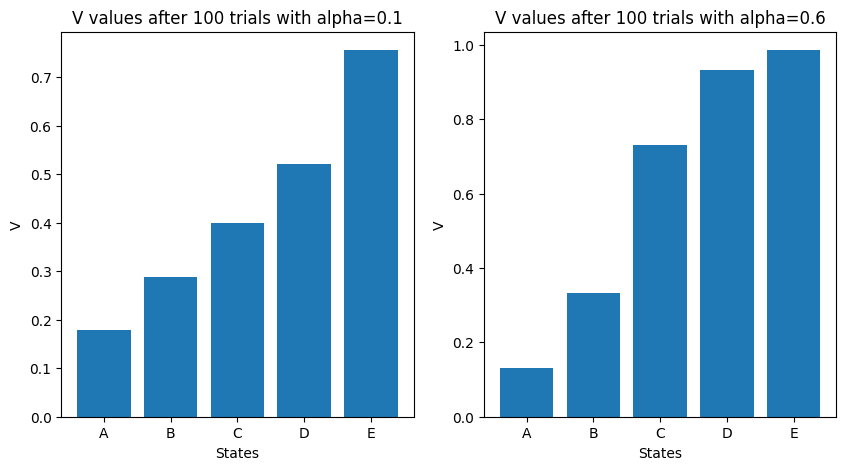

In [21]:
# TO DO
A1, B1, C1, D1, E1 = td_zero(0.1, 1, 100)
A2, B2, C2, D2, E2 = td_zero(0.6, 1, 100)

to_plot1 = [A1[-1], B1[-1], C1[-1], D1[-1], E1[-1]]
to_plot2 = [A2[-1], B2[-1], C2[-1], D2[-1], E2[-1]]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(["A", "B", "C", "D", "E"], to_plot1)
plt.ylabel("V")
plt.xlabel("States")
plt.title("V values after 100 trials with alpha=0.1")
plt.subplot(1, 2, 2)
plt.bar(["A", "B", "C", "D", "E"], to_plot2)
plt.ylabel("V")
plt.xlabel("States")
plt.title("V values after 100 trials with alpha=0.6")
plt.show()

> *Antwoord*

---

## 8. MSE

Nu willen we weten hoe goed deze waardes die de robot toekent overeenkomen met de werkelijke staat van de wereld. Analytisch kan men bepalen dat dit de verwachte waarden moeten zijn als de robot voor altijd in dit universum zou ronddolen:

$$ V(A)=\frac{1}{6}\ ,\ V(B)=\frac{2}{6}\ ,\ V(C)=\frac{3}{6}\ ,\ V(D)=\frac{4}{6}\ ,\ V(E)=\frac{5}{6}$$

Net als bij vele statistische modellen en machine learning algoritmes beoordelen we deze leeruitkomsten niet op basis van absolute verschillen van deze waardes, maar op basis van mean squared error ($MSE$). De error is in dit geval dus het verschil tussen de verwachte waarde van een staat volgens de robot, en de analytisch-verwachte waarde.

Gebruikmakende van de $MSE$ functie die je hieronder gaat schrijven, kunnen we onderzoeken hoe snel het algoritme dicht bij de echte waardes terecht komt, en welke parameter waardes voor $\alpha$ en $\gamma$ het snelst en/of het beste benaderen.

<br>

### Q8.a  (5 punten)

Schrijf nu een functie `MSE()` die de mean squared error berekent tussen de berekende verwachte waardes en de analytisch bepaalde verwachte waardes. Roep de functie `td_zero()` meerdere keren aan in een loop, elke keer met een ander aantal episodes (oplopend). Bereken dan telkens $MSE$, zodat je de veranderingen in $MSE$ per aantal episodes kan volgen. Nu kan je verschillende leercurves met elkaar vergelijken. Als het goed is wordt elke episode de verwachte waarde van de states beter benaderd, en wordt de $MSE$ dus steeds kleiner. Overigens hebben we ook te maken met toeval vanwege de muntworpen, dus er zou wel een daling in $MSE$ zichtbaar moeten zijn, maar er zal ook sprake zijn van ruis.

In [22]:
def MSE(max_episodes, alpha, gamma=1):
    # TO DO
    true_values = np.array([1/6, 2/6, 3/6, 4/6, 5/6])
    total_mse = []
    for episodes in range(1, max_episodes):
        A, B, C, D, E = td_zero(alpha, gamma, episodes)
        estimated_values = np.array([A[-1], B[-1], C[-1], D[-1], E[-1]])
        # calculate the MSE
        mse = np.mean((true_values - estimated_values)**2)
        total_mse.append(mse)
    return total_mse

* Plot de leercurves voor $\alpha = 0.75$ en $\alpha = 0.15$ voor 1 tot 100 episodes in dezelfde grafiek ($\gamma=1$).

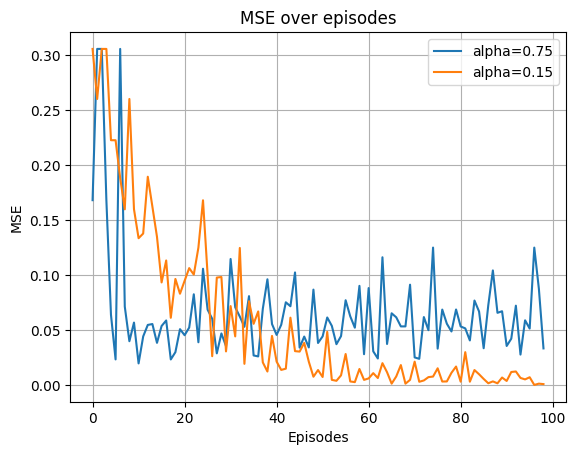

In [23]:
mse1 = MSE(100, 0.75)
mse2 = MSE(100, 0.15)

plt.plot(mse1, label="alpha=0.75")
plt.plot(mse2, label="alpha=0.15")
plt.xlabel("Episodes")
plt.ylabel("MSE")
plt.title("MSE over episodes")
plt.legend()
plt.grid()
plt.show()


* Beschrijf welk model het beste is in het begin en welke aan het eind. Waardoor komt dat? Is een hoge learning rate altijd beter?

> *Antwoord*

### Q8.b  (5 punten)

Plot nu de leercurves voor $\gamma=1$, en $\gamma=0.5$ voor 1 tot 100 episodes ($\alpha = 0.1$).  Beschrijf hoe de leercurves lopen, en laat ook de uiteindelijke $V$ waardes voor elk model zien.

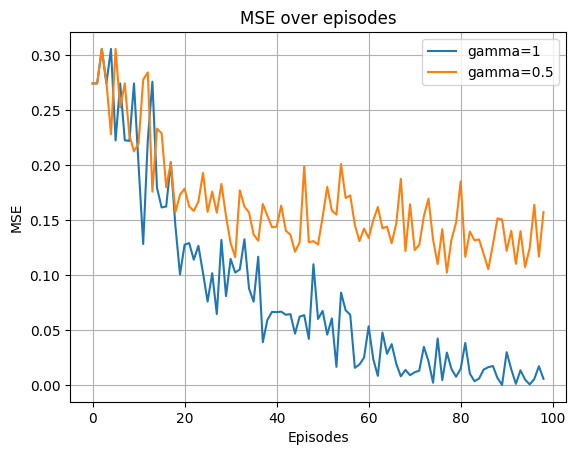

In [24]:
# TO DO plot
mse1 = MSE(100, alpha=0.1, gamma=1)
mse2 = MSE(100, alpha=0.1, gamma=0.5)

plt.plot(mse1, label="gamma=1")
plt.plot(mse2, label="gamma=0.5")
plt.xlabel("Episodes")
plt.ylabel("MSE")
plt.title("MSE over episodes")
plt.legend()
plt.grid()
plt.show()

* Wat is het effect van $\gamma$? 
* Als je kijkt naar de uiteindelijke $V$'s hoe ziet de robot met $\gamma=0.5$ de wereld (in psychologische termen)? In wat voor een situatie zou dat goed zijn?

> *Antwoord*

---

## 9. Eligibility traces                                       

Tot nu toe onthield de robot alleen waar hij precies een stap geleden was. Dit maakt leren nog niet heel efficiënt. Het kan nog steeds lang duren voordat states (of latere handelingen) credits krijgen terwijl ze ook erg dicht bij de beloning waren. Eligibility traces is een eerste stap om TD uit te breiden en om ook states die dichtbij het einddoel zijn credit te geven voor de uiteindelijke beloning (of het uitblijven daarvan). Het is wederom een zeer simpel en logisch proces, maar het maakt het leren veel efficiënter.

![](Images\random_walk_memory.png)

Je kan het vorige algoritme `td_zero()` zien alsof de robot alleen de vorige state kon onthouden. We breiden daarom nu het geheugen uit en daarmee kan hij langer dingen onthouden, en dus ook waardes toekennen aan states die langer in het verleden liggen. 

Dit gaat door middel van eligibility traces (zie college). Elke staat die recentelijk werd bezocht komt nu ook in aanmerking (is eligible) voor een value update zodra er een beloning valt. Hoe langer een staat niet bezocht is, des te minder deze in aanmerking komt voor een update. Hoe snel een staat in het verleden geen credit meer krijgt (niet meer eligible is) wordt geregeld via de $\lambda$ parameter:

$$ e_t(s)= \begin{cases}
\gamma \lambda e_{t-1}(s) & if\ s \neq s_t\\
1 & if\ s = s_t \end{cases} $$

Net als bij `td_zero()` heeft de laatst bezochte staat altijd eligibility waarde 1. Voor alle hiervoor bezochte states wordt de eligibility in waarde vermindert met parameter $\lambda$ en discount factor $\gamma$ (beide tussen 0 en 1).

In het nieuwe model worden dan de verwachte waardes van __alle__ states $s$ die eligible zijn (een $e(s) > 0$) geüpdatet met de volgende regel:

$$\Delta V(s) = \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)] e(s)$$

en dan natuurlijk:

$$V(s) = V(s) + \Delta V(s) $$

### Q9.a  (7 punten)

Implementeer eligibility traces in het `td_zero()` model, en maak er een nieuwe functie van `td_lambda()`. Hiervoor is het nodig om:

* Elke episode te beginnen met een lijst met eligibility values (EV), die begint met een eligibility van 0 voor voor alle states (A-E). 
* Deze lijst moet elke stap worden bijgehouden. Elke keer als de robot in een state komt krijgt deze EV = 1, maar hoe langer de robot niet meer in die state komt des te lager de EV wordt.
* Let op! De prediction error (PE) moet nu gebruikt worden om __alle__ states te updaten met een eligibility waarde groter dan nul.
* Zorg dat de output van de functie een lijst is van states $V$ en een lijst van eligibility waardes $e$ (een lijst per episode). 

In [ ]:
def td_lambda(alpha, gamma, lambda_, num_episodes):
    # TO DO
    states = {"start": [0], "A": [0], "B": [0], "C": [0], "D": [0], "E": [0], "end": [0]}
    elegebility = [0 for _ in range(len(states))]
    keys = list(states.keys())
    # Create for loop over episodes
    ##
    #Ik heb zin in de zomer man
    for _ in range(num_episodes):
        # episode begins in state C
        current_state = 2
        while current_state%6 != 0:
            # choose next state
            elegebility = [lambda_ * gamma * elegebility[i] if i != current_state else 1 for i in range(len(elegebility))]
            coinflip = random.randint(0, 1)
            if coinflip == 0:
                next_state = current_state + 1
            else:
                next_state = current_state - 1
            # calculate reward
            r = 1 if next_state == 6 else 0
            error = r + gamma * states[keys[next_state]][-1] - states[keys[current_state]][-1]
            Vt = states[keys[current_state]][-1] + alpha * error
            states[keys[current_state]].append(Vt)
            current_state = next_state
    A, B, C, D, E = states["A"], states["B"], states["C"], states["D"], states["E"]
    return A, B, C, D, E

* Run de`td_lambda()` functie die je net gemaakt hebt met ($\lambda=0.5$) en zonder ($\lambda=0$) eligibility traces voor slechts 1 episode (episodes = 1, $\alpha = 0.2$, $\gamma = 1$);
* Rapporteer de lijst van values $V$ en de lijst van eligibilities $e$ voor beide algoritmes.

In [26]:
# TO DO

* Wat is het verschil tussen de twee verschillende $\lambda$ waardes en waarom? Merk op dat we nog altijd te maken hebben met randomness, dus om een helder beeld te krijgen helpt het voor jezelf om je code meerdere keren te runnen.

> *Antwoord*

### Q9.b  (5 punten)

Illustreer nu het effect van verschillende waardes van $\lambda$ op de leercurve (wederom uitgedrukt in $MSE$). 

Run het `td_lambda() ` model voor 1 tot 200 episodes voor $\lambda=0.0$, $\lambda=0.5$, en $\lambda=0.9$ (voor alle modellen $\alpha=0.05$ en $\gamma=1$) en maak een grafiek.

In [27]:
# TO DO plot


Beschrijf aan de hand van de grafiek wat het effect van $\lambda$ op leren is.

> *Antwoord*